In [1]:
# Problem statement : Input preparation
# Transforming dataset into csv 
# Normalizing dataset
# Defining what makes a good investment(i.e data fields of interest)
# Model creation 
# Creating neural network (L-Short term memory network)
# first sigmoid function
# sigmoid function and the second is the tanh function 
# final output
# Model Training
# Plotting predictions
# Dashboards

In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [3]:
#Data intake 
df_train = pd.read_csv('GOOG_train10.csv')
df_test = pd.read_csv('GOOG_test10.csv')

In [4]:
# Train dataframe values
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,297.126312,301.664276,297.126312,301.046600,301.046600,4748131
1,2011-01-04,301.679230,301.958191,298.939514,299.935760,299.935760,3662677
2,2011-01-05,298.914581,304.025452,298.904633,303.397797,303.397797,5083583
3,2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026
4,2011-01-07,306.805023,307.970642,303.925812,307.069031,307.069031,4218152


In [5]:
#dataframe values
df_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-14,2895.399902,2908.840088,2844.850098,2899.409912,2899.409912,1238900
1,2021-12-15,2887.320068,2950.344971,2854.110107,2947.370117,2947.370117,1364000
2,2021-12-16,2961.540039,2971.030029,2881.850098,2896.770020,2896.770020,1370000
3,2021-12-17,2854.290039,2889.201904,2835.760010,2856.060059,2856.060059,2162800
4,2021-12-20,2813.592041,2852.209961,2805.000000,2848.030029,2848.030029,1013200


In [6]:
# df_train contains only the row of columns close to train the model. Close| the matured stock price per day  
df_train = df_train.filter(['Close'])
df_test = df_test.filter(['Close'])

In [7]:
df_train.shape

(2756, 1)

In [8]:
# Creating copy of df to use 
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [9]:
#Returns a numpy representation of the dataframe 
df_train_copy = df_train_copy.values
df_test_copy = df_test_copy.values

In [10]:
df_train_copy

array([[ 301.0466  ],
       [ 299.93576 ],
       [ 303.397797],
       ...,
       [2962.120117],
       [2973.5     ],
       [2934.090088]])

In [11]:
df_train

,Close
0,301.046600
1,299.935760
2,303.397797
3,305.604523
4,307.069031
...,...
2751,2960.729980
2752,2974.409912
2753,2962.120117
2754,2973.500000


In [12]:
df_test

,Close
0,2899.409912
1,2947.370117
2,2896.770020
3,2856.060059
4,2848.030029
5,2884.409912
6,2938.979980
7,2942.850098
8,2961.280029
9,2928.959961


In [13]:
# Scale the data (why is scalling important? 
from sklearn.preprocessing import MinMaxScaler
# Learns the datasets parameters and applies it to get the scaled dataset
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df_train)
df_train = scaler.transform(df_train)
df_test = scaler.transform(df_test)

In [14]:
df_train

array([[0.02321884],
       [0.02281891],
       [0.02406531],
       ...,
       [0.98125745],
       [0.98535443],
       [0.97116609]])

In [15]:
df_test

array([[0.95868054],
       [0.97594716],
       [0.95773013],
       [0.94307375],
       [0.94018278],
       [0.95328025],
       [0.97292654],
       [0.97431986],
       [0.980955  ],
       [0.96931914],
       [0.96972601],
       [0.9661114 ],
       [0.95658529],
       [0.95942941],
       [0.95469159],
       [0.90599533],
       [0.90525727],
       [0.90132229],
       [0.91262326],
       [0.92301707],
       [0.93475726],
       [0.91663393],
       [0.92135374],
       [0.89618119],
       [0.89158374],
       [0.87613524],
       [0.85154958],
       [0.85356563],
       [0.82738142],
       [0.84541483],
       [0.84455794],
       [0.87457281],
       [0.89191853],
       [0.90761542],
       [0.98075697],
       [0.94197567],
       [0.94460743],
       [0.91524421],
       [0.91722432],
       [0.93335322],
       [0.9128285 ],
       [0.88062476]])

In [16]:
len(df_train)

2756

In [17]:
i = 2756

In [18]:
#2D 
df_train[i-10:i, 0]

array([0.9405464 , 0.9345413 , 0.95008332, 0.94103958, 0.95022729,
       0.98075697, 0.98568201, 0.98125745, 0.98535443, 0.97116609])

In [19]:
df_train_copy

array([[ 301.0466  ],
       [ 299.93576 ],
       [ 303.397797],
       ...,
       [2962.120117],
       [2973.5     ],
       [2934.090088]])

In [20]:
x_train = []
y_train = []
# I, I+1,.... I-10th  WHERE WE PREDICT I11th ex(x_train is days 0-9 where we predict the 10th days price)
for i in range(10,len(df_train)):
    x_train.append(df_train[i-10:i, 0])
    y_train.append(df_train_copy[i, 0])

In [21]:
x_test = []
y_test = []

for i in range(10,len(df_test)):
    x_test.append(df_test[i-10:i, 0])
    y_test.append(df_test_copy[i, 0])

In [22]:
x_train

[array([0.02321884, 0.02281891, 0.02406531, 0.02485978, 0.02538703,
        0.0249871 , 0.02530991, 0.02546415, 0.02543187, 0.02677511]),
 array([0.02281891, 0.02406531, 0.02485978, 0.02538703, 0.0249871 ,
        0.02530991, 0.02546415, 0.02543187, 0.02677511, 0.02954587]),
 array([0.02406531, 0.02485978, 0.02538703, 0.0249871 , 0.02530991,
        0.02546415, 0.02543187, 0.02677511, 0.02954587, 0.02813268]),
 array([0.02485978, 0.02538703, 0.0249871 , 0.02530991, 0.02546415,
        0.02543187, 0.02677511, 0.02954587, 0.02813268, 0.02723959]),
 array([0.02538703, 0.0249871 , 0.02530991, 0.02546415, 0.02543187,
        0.02677511, 0.02954587, 0.02813268, 0.02723959, 0.02456028]),
 array([0.0249871 , 0.02530991, 0.02546415, 0.02543187, 0.02677511,
        0.02954587, 0.02813268, 0.02723959, 0.02456028, 0.02442578]),
 array([0.02530991, 0.02546415, 0.02543187, 0.02677511, 0.02954587,
        0.02813268, 0.02723959, 0.02456028, 0.02442578, 0.02600933]),
 array([0.02546415, 0.02543187, 0.

In [23]:
#**************************************HERE********************************************************
# Convert the x_train and y_train to numpy arrays 
import numpy as np
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
np.array(x_train).shape

(2746, 10)

In [25]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [26]:
x_train.shape

(2746, 10, 1)

In [27]:
import numpy as np
x_test, y_test = np.array(x_test), np.array(y_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# x_train.shape

In [28]:
x_train.shape[1]

10

In [29]:
x_train.shape

(2746, 10, 1)

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization

# clear backend session
tf.keras.backend.clear_session()

# Build the LSTM model
model = Sequential()
model.add(LSTM(64,activation="tanh",
    recurrent_activation="sigmoid",return_sequences=True, input_shape= (x_train.shape[1], 1) ))
#overfitting, val_loss not decreasing
model.add(LSTM(16, return_sequences=False))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(25))
model.add(Dropout(0.3))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_percentage_error'])

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=15, validation_data = (x_test, y_test), callbacks= )


Epoch 1/50
86/86 [==============================] - 10s 31ms/step - loss: 1214311.1250 - mean_absolute_percentage_error: 100.5218 - val_loss: 7535660.0000 - val_mean_absolute_percentage_error: 99.2489
Epoch 2/50
86/86 [==============================] - 1s 10ms/step - loss: 1181169.1250 - mean_absolute_percentage_error: 101.2764 - val_loss: 7194338.0000 - val_mean_absolute_percentage_error: 96.9687
Epoch 3/50
86/86 [==============================] - 1s 9ms/step - loss: 1102818.8750 - mean_absolute_percentage_error: 102.1711 - val_loss: 6251784.0000 - val_mean_absolute_percentage_error: 90.3735
Epoch 4/50
86/86 [==============================] - 1s 8ms/step - loss: 969542.3750 - mean_absolute_percentage_error: 102.7268 - val_loss: 4468714.0000 - val_mean_absolute_percentage_error: 76.3525
Epoch 5/50
86/86 [==============================] - 1s 10ms/step - loss: 777378.0625 - mean_absolute_percentage_error: 101.4373 - val_loss: 2635003.5000 - val_mean_absolute_percentage_error: 58.5403
Epo

In [ ]:
# m1 - 90 - 1
# m2 - 80 - 2
# m3 - 95 - 3
# m4 - 93
# m5 - 87

In [31]:
# Get the models predicted price values 
predictions = model.predict(x_test)

In [32]:
# pd.DataFrame({'Actual':y_test,'Prediction':predictions[:,0]})

In [33]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse
#The lower the rmse the better the model (first: 1054.3914823384375, 1094.767695134332,1056.5549541931612)

169.4781286677863

In [34]:
# Grid Search
# random Search
# https://stackoverflow.com/questions/40761185/what-is-the-intuition-of-using-tanh-in-lstm
# https://www.kaggle.com/code/shujunge/gridsearchcv-with-keras/notebook

In [35]:
import matplotlib.pyplot as plt

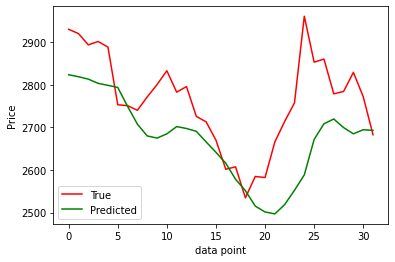

In [36]:
plt.plot(y_test,label='True',color='r')
plt.plot(predictions,label='Predicted',color='g')
plt.ylabel('Price')
plt.xlabel('data point')
plt.legend()

In [37]:
# Model tunning/ optimizing performance with finding the best parameters for the model using gridsearch
# Collect information per iteration

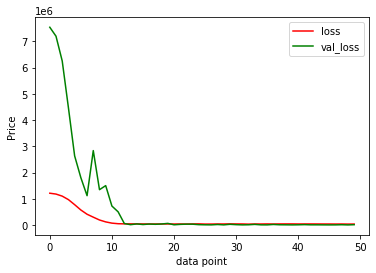

In [38]:
# history.history
plt.plot(history.history['loss'],label='loss',color='r')
plt.plot(history.history['val_loss'],label='val_loss',color='g')
plt.ylabel('Price')
plt.xlabel('data point')
plt.legend()

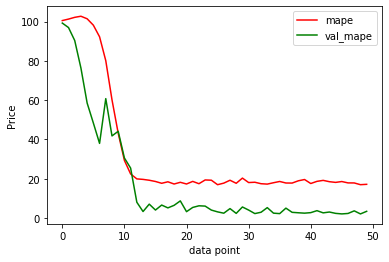

In [39]:


plt.plot(history.history['mean_absolute_percentage_error'],label='mape',color='r')
plt.plot(history.history['val_mean_absolute_percentage_error'],label='val_mape',color='g')
plt.ylabel('Price')
plt.xlabel('data point')
plt.legend()